# Lab 1:
Trong chương này, chúng ta sẽ ôn tập các khái niệm nền tảng:
- Entropy
- Lý thuyết thông tin (Information Theory)

Mỗi phần sẽ gồm: lý thuyết ngắn gọn và bài tập thực hành.

**Lưu ý**: Từ Lab này sẽ trở về sau sẽ yêu cầu nộp file thực hành

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import entropy, norm, multivariate_normal
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 1. **Entropy**

Entropy là thước đo lượng thông tin hoặc mức độ bất ngờ khi quan sát một biến ngẫu nhiên rời rạc.  

**Nguyên tắc cơ bản**: nếu xác suất xảy ra $p(x)$ thấp thì thông tin $h(x)$ cao (và ngược lại), đồng thời với hai biến độc lập $X, Y$ thì thông tin cộng dồn $h(x,y) = h(x) + h(y)$.  

Từ đó, công thức được xác định như sau:  
- Thông tin của một sự kiện: $h(x) = -\log p(x)$  
- Entropy của biến ngẫu nhiên rời rạc $X$ được định nghĩa như sau:  
  $$
  H[X] =  E[h(x)] =- \sum_x p(x)\log p(x)
  $$

**Bài tập 1:**
Hãy viết một hàm tính entropy $H(x)$ của một biến ngẫu nhiên rời rạc từ một vector số nguyên `x`.  
- Input: `x` là một vector (danh sách) các số nguyên.  
- Output: giá trị entropy $H(x)$.  

In [2]:
def calEntropy(x):

  #  Hint:
  #  -  Chuyển đổi dữ liệu đầu vào `x` thành mảng **NumPy** bằng `np.array(x)`. skip

  #  -  Sử dụng `np.unique(x, return_counts=True)` để lấy
  #  **các giá trị duy nhất** và **số lần xuất hiện** (`counts`) của chúng.

  #  -  Tính **xác suất** (`probs`) của mỗi giá trị bằng cách
  #   chia `counts` cho **tổng số phần tử** (`counts.sum()`).

  #  -  Áp dụng công thức **Entropy Shannon** H(X) = -\sum p(x) \cdot \log_2(p(x))

  x = np.array(x)  # chuyển đổi dữ liệu đầu vào thành mảng Num
  unique, counts = np.unique(x, return_counts=True)  # lấy các giá trị duy nhất và số lần xuất hiện
  probs = counts / counts.sum()  # tính xác suất của mỗi giá trị
  probs = -probs * np.log2(probs)
  H_x = probs.sum()

  return H_x


In [7]:
x = np.array([1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5])
H_x = calEntropy(x)

print("Sample array:", x)
print("Entropy:", calEntropy(x))

# Kết quả kì vọng:
# Entropy: (np.float64(2.299896391167891), np.float64(2.299896391167891))

Sample array: [1 1 2 2 3 3 3 4 4 5 5]
Entropy: 2.299896391167891


In [3]:
# To do:
  # 1. Tạo một mảng ngẫu nhiên sử dụng hàm randint của np
  # 2. Thử nghiệm mảng này với hàm calEntropy vừa build
  # 3. Thử so sánh với thư viện scipy.entropy với base = 2

new_arr = np.random.randint(0,10,100)
print(f"Entropy of new array: {calEntropy(new_arr)}")

value, counts = np.unique(new_arr, return_counts=True)
probs = counts / counts.sum()
print(f"Entropy from scipy: {entropy(probs, base=2)}")


Entropy of new array: 3.273725316320005
Entropy from scipy: 3.273725316320006


- **Differential entropy**:  
  $$
  H[X] = - \int p(x)\ln p(x)\,dx 
  $$  
  Khác với biến rời rạc, entropy có thể âm vì mật độ xác suất $p(x)$ có thể lớn hơn 1.
  

- **Conditional entropy**:  
  $$
  H[Y|X] = - \iint p(x,y)\ln p(y|x)\,dxdy
  $$  

  và ta có quan hệ:  
  $$
  H[X,Y] = H[Y|X] + H[X]
  $$

### Entropy cho hai biến ngẫu nhiên rời rạc

 **Bài tập 2**:Hãy viết một hàm tính entropy có điều kiện $H(X|Y)$ của hai biến ngẫu nhiên rời rạc `x` và `y`.

- **Input:**  
  - `x`, `y`: hai vector số nguyên có cùng độ dài.  
- **Output:**  
  - Giá trị entropy có điều kiện \(H(X|Y)\).  

**Hint:**  
1. Tính phân phối đồng thời \(p(x,y)\).
2. Tính entropy chung:
   $$H(X,Y) = - \sum_{x,y} p(x,y)\log_2 p(x,y)$$
3. Tính entropy của \(Y\):
   $$H(Y) = - \sum_y p(y)\log_2 p(y)$$
4. Suy ra:
   $$H(Y|X) = H(X,Y) - H(Y)$$

In [4]:
def calJointEntropy(x, y):

    # TODO 1: Kết hợp hai biến X và Y thành các cặp giá trị tương ứng
    # Gợi ý: Dùng zip(x, y) để tạo danh sách các cặp (xi, yi)
    xy_pairs = np.array(list(zip(x,y)))

    # TODO 2: Đếm số lần xuất hiện của từng cặp giá trị duy nhất
    # Gợi ý: np.unique(..., axis=0, return_counts=True)
    unique_pairs, counts = np.unique(xy_pairs, axis=0, return_counts=True)

    # TODO 3: Tính xác suất của từng cặp giá trị (p_xy)
    # Gợi ý: Chia mỗi count cho tổng số mẫu
    p_xy = counts / counts.sum()

    # TODO 4: Tính entropy chung H(X,Y)
    # Gợi ý: Công thức H(X,Y) = -∑ p(x,y) * log2(p(x,y))
    p_xy = -p_xy * np.log2(p_xy)
    H_xy = p_xy.sum()

    # TODO 5: Tính giá trị H_x (Entropy của X) sử dụng hàm calEntropy đã build trước đó
    # Lưu ý: Đổi y thành x, và đổi tên biến kết quả cho rõ ràng (H_x thay vì H_y)
    H_x = calEntropy(x)

    # TODO 6: Tính H(Y|X) sử dụng công thức H(Y|X) = H(X,Y) - H(X)

    return H_xy - H_x

In [5]:
x, y = np.random.randint(0, 3 , 20), np.random.randint(0, 3, 20)
print("Sample array x:", x)
print("Sample array y:", y)

H_XY = calJointEntropy(x,y)

print("H_XY :" , H_XY)

Sample array x: [0 2 1 2 2 0 0 0 0 1 1 2 0 0 0 2 1 0 1 2]
Sample array y: [0 1 0 2 2 0 2 2 2 2 2 1 2 2 0 2 2 2 1 0]
H_XY : 1.1937151490463607


### Entropy cho phân phối Gaussian

**Bài Tập 4**: Tính **Differential Entropy** cho Phân phối Gaussian

- **Input:**  
  - $X \sim \mathcal{N}(\mu, \sigma^2)$  
- **Output:**  
  - Giá trị entropy h(X).

Hint: Differential Entropy của phân phối Gaussian có thể viết lại như sau:

$$H(X) = \frac{1}{2} \log_{2}(2\pi e \sigma^2)$$

In [6]:
def calGaussianEntropy(mu, sigma):
    # Tính giá trị H_X dựa trên công thức
    H_x = 0.5 * np.log2(2 * np.pi * np.e * (sigma ** 2))
    return H_x

In [7]:
mu, sigma = 1, 4
H_X = calGaussianEntropy(mu, sigma)
print("H_X:", H_X)

#H_X đúng là 4.0470

H_X: 4.047095585180641


Với phân phối Gaussian đa biến $X \sim \mathcal{N}_{D}(\mu, \boldsymbol{\Sigma})$  , entropy của nó có thể được tính như sau:

$$
H(X)= \frac{D}{2}(1 + \log(2\pi)) + \frac{1}{2}\log |\boldsymbol{\Sigma}|.
$$

- Với $D$  là một hằng số đã biết, được xác định bởi kích thước của vector đầu vào $\mathbf{x}$ và kích thước của ma trận hiệp phương sai.
- $|\boldsymbol{\Sigma}|$ là định thức của ma trận hiệp phương sai

In [8]:
def multiGaussian(mu, Sigma):

    # Tính D bằng cách lấy len của mu hoặc shape của sigma
    # Tính định thức sử dụng np.linagl.det
    # Tính H dựa trên công thức ở trên

    D = len(mu)
    det_Sigma = np.linalg.det(Sigma)
    H = 0.5 * np.log2((2 * np.pi * np.e) ** D * det_Sigma)

    return H


In [9]:
mu = np.array([0.0, 1.0, 2.0])
Sigma = np.array([
    [2.0, 0.5, 0.3],
    [0.5, 1.5, 0.4],
    [0.3, 0.4, 3.0]
])

In [10]:
H_bits = multiGaussian(mu, Sigma)
print(f"\nDifferential Entropy H(X) = {H_bits:.6f} bits")


Differential Entropy H(X) = 7.633581 bits


Với $ Y|X \sim \mathcal{N}(\mu_{Y|X}, \sigma_{Y|X}^2) $, ta có:

$$
H(Y|X) = -\mathbb{E}_{p(x)} \int p(y|x) \log p(y|x) \, dy
$$

Vì mỗi $p(y|x)$ là Gaussian có cùng $\sigma_{Y|X}$, nên entropy không phụ thuộc vào $x$.  
Do đó:

$$
H(Y|X) = \frac{1}{2}\log(2\pi e \sigma_{Y|X}^2)
$$

thay $\mathbf{\sigma_{Y|X}^2}$ bằng công thức tương quan:

$$
\mathbf{H(Y|X)} = \frac{1}{2}\log \left( 2\pi e \sigma_Y^2 (1 - \rho^2) \right)
$$

Với $\rho$ là hệ số tương quan và được tính như sau:

$$
\rho = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

**Bài Tập 5**: Tính *Conditional Entropy* cho phân phối Gaussian hai biến  

- **Đề bài:**  
  Giả sử hai biến ngẫu nhiên liên tục $X$ và $Y$ có phân phối chuẩn song biến, với:  
  $$(X, Y) \sim \mathcal{N}\left(
    \begin{bmatrix}
      \mu_X \\
      \mu_Y
    \end{bmatrix},
    \begin{bmatrix}
      \sigma_X^2 & \rho\sigma_X\sigma_Y \\
      \rho\sigma_X\sigma_Y & \sigma_Y^2
    \end{bmatrix}
  \right)$$

  Hãy tính *conditional entropy* $ H(Y|X) $ biết $X \sim \mathcal{N}(1, 4)$ và $Y \sim \mathcal{N}(1, 9)$.

- **Gợi ý:**  
  Với phân phối Gaussian, *conditional entropy* được cho bởi:
  $$
  \mathbf{H(Y|X)} = \frac{1}{2}\log \left( 2\pi e \sigma_Y^2 (1 - \rho^2) \right)
  $$

  Trong đó, hệ số tương quan $ \rho $ được tính bằng:
  $$
  \rho = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
  $$

- **Yêu cầu:**  
  - Viết code tính $ H(Y|X) $ khi biết $ \sigma_X, \sigma_Y, \rho $.

  - Sinh mẫu bằng `rvs` (random variates) từ phân phối Gaussian hai biến và **ước lượng H(Y|X) trực tiếp từ mẫu**

In [11]:
mu_X = 1.0
mu_Y = 1.0
sigma_X_sq = 4.0
sigma_Y_sq = 9.0
rho = 0.7

In [12]:
# Tính sigmaX, sigmaY và Covariance XY, uncomment các biến bên dưới

X =  np.random.normal(mu_X, np.sqrt(sigma_X_sq), 1000)
Y =  np.random.normal(mu_Y, np.sqrt(sigma_Y_sq), 1000)

sigma_X = np.std(X)
sigma_Y = np.std(Y)
covariance_XY = np.cov(X, Y)[0][1]

In [13]:
#Tính ma trận Sigma, uncomment các biến bên dưới

Sigma = np.array([
    [sigma_X_sq, rho * np.sqrt(sigma_X_sq * sigma_Y_sq)],
    [rho * np.sqrt(sigma_X_sq * sigma_Y_sq), sigma_Y_sq]
])

In [14]:
# Tính sigmaY|X và h_Y
#sigma_Y_given_X_sq = sigma_Y_sq * (1 - rho**2)
h_Y = 0
h_Y = 0.5 * np.log2(2 * np.pi * np.e * (sigma_Y_sq * (1 - rho**2)))

print(f"H(Y|X) theory = {h_Y:.4f} nats")

H(Y|X) theory = 3.1463 nats


In [15]:
N_samples = 100000

# Sinh data sử dụng scipy.multivariate_normal.rvs
data = multivariate_normal.rvs(mean=[mu_X, mu_Y], cov=Sigma, size=N_samples)

X_samples = data[:, 0]
Y_samples = data[:, 1]


In [16]:
# Tính sigma_estimated sử dụng hàm np.cov
Sigma_estimated = np.cov(data, rowvar=False)

# Tính sigma X Y, cov
sigmaX_est = Sigma_estimated[0][0]
sigmaY_est = Sigma_estimated[1][1]
covariance_XY_est = Sigma_estimated[0][1]

# Tính  rho estimated
rho_est = covariance_XY_est / (np.sqrt(sigmaX_est * sigmaY_est))
print(rho_est)

0.698273391965551


In [17]:
# Tính hY_est dựa trên công thức:

hY_est = 0
print(f"H(Y|X) Estimate = {hY_est:.4f} nats")


## Nếu tính đúng các bạn sẽ thấy hai giá trị theory và estimate sẽ xấp xỉ nhau

H(Y|X) Estimate = 0.0000 nats


# 2. **Lý Thuyết Thông Tin**

## KL Divergence  

**Kullback–Leibler (KL) divergence** đo sự khác biệt giữa hai phân phối xác suất \(p\) và \(q\):  

$$
\begin{aligned}
KL(p \| q) &= -\int p(x)\ln q(x)\,dx - \Big(-\int p(x)\ln p(x)\,dx\Big) \\
           &= - \int p(x)\ln \frac{p(x)}{q(x)}\,dx \\
\end{aligned}
$$

## Tính chất
- $ KL(p \| q) \neq KL(q \| p) $
- $ KL(p \| p) = 0 $
- $ KL(p \| q) \geq 0 $

## Ý nghĩa
- KL divergence đo lường **sự khác biệt** giữa phân phối "thật" `p` và phân phối xấp xỉ `q`.


**Bài tập 3**: Cho `X` là biến ngẫu nhiên rời rạc với $X = \{x_1, x_2, ... , x_k\}$ và xác xuất $p_i = P(X = x_i), q_i = Q(X= x_i)$, Hãy viết một hàm tính KL Divergence của chúng biết:


$$
\begin{aligned}
  KL(p \| q) = - \sum_i^k p_i \ln \frac{p_i}{q_i}\, = - \sum_i^k p_i \ln p_i+\sum_i^k p_i \ln q_i
\end{aligned}
$$


- **Input:**  
  - `x`, `y`: hai vector số nguyên có cùng độ dài.  
  - Dùng `log2`
- **Output:**  
  - Độ đo KL.

In [1]:
def kullback_leibler(x, y):

    # TODO 1: Xác định kích thước mẫu (`n`).
    n = len(x)
    # TODO 2: Tính tần suất xuất hiện (phân phối thực tế $P(x)$)
    unique_x, counts_x = np.unique(x, return_counts=True)
    Px = counts_x / counts_x.sum()
    # TODO 3: Tương tự, tính phân phối $Q(y)$ từ `y`.
    unique_y, counts_y = np.unique(y, return_counts=True)
    Qy = counts_y / counts_y.sum()
    # TODO 4: Tạo một dictionary để dễ dàng tra cứu xác suất của các giá trị trong `y`.
    Qy_dict = dict(zip(unique_y, Qy))
    # TODO 5: Xây dựng mảng xác suất $Q(x)$ (`Py`)
    Py = np.array([Qy_dict.get(val, 1e-10) for val in unique_x])
    # TODO 5: Chuẩn hóa lại mảng $Q(x)$ (`Py`). để sum của nó là 1
    Py = Py / Py.sum()
    # TODO 6: Tính **KL divergence** $D_{KL}(P\|Q)$ thủ công
    z = 0
    for p, q in zip(Px, Py):
        if p > 0:
            z += p * np.log2(p / q)
    # TODO 7: Tính **KL divergence** bằng hàm thư viện `entropy(Px, Py, base=2)` của SciPy.
    kl_scipy = entropy(Px, Py, base=2)
    # TODO 8: Trả về KL thủ công (dùng `max(0, z)` để xử lý sai số âm) và KL bằng SciPy.
    return max(0, z), kl_scipy

In [4]:
x, y = np.random.randint(0, 3 , 20), np.random.randint(0, 3, 20)
print("Sample array x:", x)
print("Sample array y:", y)

# TO DO:
# - Tính KL
# - So sánh kết quả với thư viện scipy

KL, KL_scipy = kullback_leibler(x,y)
print("KL:", KL)
print("KL_scipy", KL_scipy)

Sample array x: [2 0 0 0 2 0 2 2 1 1 2 1 2 2 0 1 2 0 0 1]
Sample array y: [1 2 2 0 1 0 1 2 1 1 0 0 2 0 1 2 2 1 2 1]
KL: 0.0774394444083836
KL_scipy 0.07743944440838356


## Mutual Information (Thông tin Tương hỗ)

- **Định nghĩa:**
 $$ I[X,Y] = KL(p(X,Y) \| p(X)p(Y)) $$
  - Đo lường mức độ **tương tác/độc lập** giữa hai biến \(X\) và \(Y\).
  - Nếu \(X\) và \(Y\) **độc lập**:
    $$
    I[X,Y] = 0 \iff p(X,Y) = p(X)p(Y)
    $$

- **Công thức chi tiết:**
  $$
  \begin{align*}
  I[X,Y] &= - \int \int p(x,y) \ln \frac{p(x)p(y)}{p(x,y)} dx dy \\
         &= H[X] - H[X|Y] \\
         &= H[Y] - H[Y|X]
  \end{align*}
  $$


**Bài tập 4:** Hãy viết một hàm tính Mutual Information của hai biến ngẫu nhiên rời rạc `x` và `y`.

- **Input:**  
  - `x`, `y`: hai vector số nguyên có cùng độ dài.  
- **Output:**  
  - Giá trị $I[X,Y]$.  

- **Hint**: Sử dụng hai hàm `calEntropy` và `calJointEntropy` đã xây dựng ở trên.

In [5]:
def mutual_inform(x,y):
    Hx = 0
    Hy = 0

    H_xy = 0

    I_xy = Hx + Hy - H_xy
    return max(0,I_xy)

In [6]:
x, y = np.random.randint(0, 3 , 20), np.random.randint(0, 3, 20)
print("Sample array x:", x)
print("Sample array y:", y)

inform = mutual_inform(x,y)
print("Mutual Information:", inform)

Sample array x: [1 2 1 2 1 2 2 0 0 0 1 1 1 1 2 2 2 2 0 1]
Sample array y: [1 0 2 2 0 0 0 1 2 2 1 2 1 2 2 1 1 2 1 1]
Mutual Information: 0


## KL Divergence giữa hai phân phối:

### **Bernouli**

Giả sử ta có hai phân phối Bernoulli như sau:

$$ 
P = Bernoulli(p)
$$  

$$ Q = Bernoulli(q) $$

Khi đó, entropy cho một phân phối Bernouli được tính như sau:

$$
\begin{aligned}
  H(P) &=- \sum_{x \in \{0,1\}} p(x)\log p(x) \\
  &=  -p \times log_2(p) - (1 - p) \times log_2(1 - p) \\
\end{aligned}
$$


Và KL Divergence có dạng:
$$
  D_{KL}(P || Q)
= p \times log( \frac{p}{q} ) + (1 - p) \times log( \frac{1 - p}{1 - q})
$$

Cho ba phân phối Bernouli $q_1, q_2, q_3$, sử dụng công thức độ lệch Kullback–Leibler để tìm xem $q_K$ nào gần p nhất, biết:

- $q_1 = 0.35$
- $q_2 = 0.77$
- $q_3 = 0.98$
- $p = 0.8$

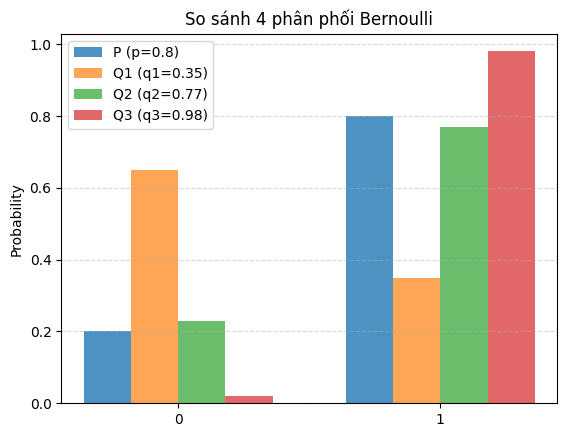

In [7]:
p, q1, q2, q3 = 0.8, 0.35, 0.77, 0.98
x = np.array([0, 1])

# Biểu diễn phân phối dưới dạng [P(X=0), P(X=1)] = [1-p, p]
P  = np.array([1 - p, p])
Q1 = np.array([1 - q1, q1])
Q2 = np.array([1 - q2, q2])
Q3 = np.array([1 - q3, q3])

# TODO 4: Vẽ biểu đồ cột so sánh 4 phân phối
width = 0.18
plt.bar(x - 3*width/2, P,  width, label=f'P (p={p})', alpha=0.8)
plt.bar(x - width/2,   Q1, width, label=f'Q1 (q1={q1})', alpha=0.7)
plt.bar(x + width/2,   Q2, width, label=f'Q2 (q2={q2})', alpha=0.7)
plt.bar(x + 3*width/2, Q3, width, label=f'Q3 (q3={q3})', alpha=0.7)

plt.xticks(x, ['0', '1'])
plt.ylabel('Probability')
plt.title('So sánh 4 phân phối Bernoulli')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [11]:
def bernoulli_kl(p, q):

    # TODO: Áp dụng công thức tính KL Divergence cho hai pp bernouli
    # Hint: dùng log2 nếu muốn kết quả theo đơn vị bit
    if p == 0:
        val = np.log2(1 / (1 - q))
    elif p == 1:
        val = np.log2(1 / q)
    else:
        val = p * np.log2(p / q) + (1 - p) * np.log2((1 - p) / (1 - q))

    return val

# Tính KL divergence
kl_q1 = bernoulli_kl(p, q1)
kl_q2 = bernoulli_kl(p, q2)
kl_q3 = bernoulli_kl(p, q3)

print("KL Divergence results (D_KL(P || X)):")
print(f"Q1 (q1={q1}): {kl_q1:.4f}")
print(f"Q2 (q2={q2}): {kl_q2:.4f}")
print(f"Q3 (q3={q3}): {kl_q3:.4f}")

KL Divergence results (D_KL(P || X)):
Q1 (q1=0.35): 0.6140
Q2 (q2=0.77): 0.0038
Q3 (q3=0.98): 0.4302


**Câu hỏi:** Bạn có nhận xét gì ?

### **Gaussian**

Giả sử ta có hai phân phối Gaussian:

- $ P = \mathcal{N}(\mu_p, \sigma_p^2) $
- $ Q = \mathcal{N}(\mu_q, \sigma_q^2) $

Công thức KL divergence được định nghĩa là:

$$
D_{KL}(P \| Q)
= \int p(x) \log \frac{p(x)}{q(x)} dx
$$

Khai triển cho trường hợp Gaussian ta được:

$$
D_{KL}(p \parallel q) = \frac{1}{2}\left( \log\left(\frac{\sigma_q^2}{\sigma_p^2}\right) + \frac{\sigma_p^2 + (\mu_p - \mu_q)^2}{\sigma_q^2} - 1 \right)
$$

Bạn nào làm tới đây có thể thử chứng minh công thức này lấy điểm cộng, giới hạn thời gian trong tiết thực hành đến đầu tiết lý thuyết trong ngày

Cho 4 phân phối như sau:
- $p\sim\mathcal{N}(1.00, 4.00)$
- $q1\sim\mathcal{N}(1.00, 3.00)$
- $q2\sim\mathcal{N}(3.00, 9.00)$
- $q3\sim\mathcal{N}(4.00, 16.00)$

- Vẽ pdf với kích thước mẫu n=10000 với 4 phân phối này. Đường phân phối của p là nét liền, các đường còn lại dùng nét đứt --
- Giả sử $p$ là .... Tính $D_{L}{(p||q_i)}$ của từng cặp $(p, q_i)$ và cho nhận xét.

In [17]:
mu_p, var_p = 1.00, 4.00
mu_q1, var_q1 = 1.00, 3.00
mu_q2, var_q2 = 3.00, 9.00
mu_q3, var_q3 = 4.00, 16.00

# Tính từng cặp sigma
sigma_p = np.sqrt(var_p)
sigma_q1 = np.sqrt(var_q1)
sigma_q2 = np.sqrt(var_q2)
sigma_q3 = np.sqrt(var_q3)


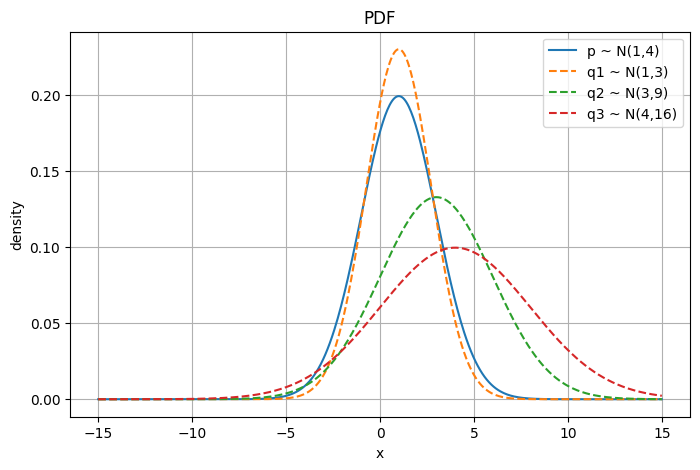

In [18]:
 x_vals = np.linspace(-15, 15, 500)

 plt.figure(figsize=(8,5))
 plt.plot(x_vals, norm.pdf(x_vals, loc=mu_p, scale=sigma_p), label="p ~ N(1,4)")
 plt.plot(x_vals, norm.pdf(x_vals, loc=mu_q1, scale=sigma_q1), label="q1 ~ N(1,3)", linestyle = 'dashed')
 plt.plot(x_vals, norm.pdf(x_vals, loc=mu_q2, scale=sigma_q2), label="q2 ~ N(3,9)", linestyle = 'dashed')
 plt.plot(x_vals, norm.pdf(x_vals, loc=mu_q3, scale=sigma_q3), label="q3 ~ N(4,16)", linestyle = 'dashed')

 plt.title("PDF")
 plt.xlabel("x")
 plt.ylabel("density")
 plt.legend()
 plt.grid(True)
 plt.show()

In [15]:
def KL(mu_p, sigma_p_sq, mu_q, sigma_q_sq):
    # Tính KL dựa trên công thức bên trên
    kl_div = np.log(sigma_q_sq / sigma_p_sq) + (sigma_p_sq + (mu_p - mu_q)**2) / (2 * sigma_q_sq) - 0.5
    return kl_div

In [19]:
KL_q1_p = KL(mu_q1, sigma_q1, mu_p, sigma_p)
KL_q2_p = KL(mu_q2, sigma_q2, mu_p, sigma_p)
KL_q3_p = KL(mu_q3, sigma_q3, mu_p, sigma_p)

In [20]:
print(f"KL(q1 || p) = {KL_q1_p:.6f}")
print(f"KL(q2 || p) = {KL_q2_p:.6f}")
print(f"KL(q3 || p) = {KL_q3_p:.6f}")

KL(q1 || p) = 0.076854
KL(q2 || p) = 0.844535
KL(q3 || p) = 2.056853
